In [2]:
# imports
from bs4 import BeautifulSoup as BS
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
# set plotting params
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 24

In [4]:
file_path = '../data/ufodata.json'

In [35]:
reports = []
with open(file_path) as f:
    for i in f:
        reports.append(json.loads(i))
            
print(len(reports))

136494


In [5]:
class CleanUFOs:
    def __init__(self, file_path):
        self.file_path = file_path
        self.rows = []
        self.load_data()
        
    def load_data(self):
        self.reports = []
        with open(self.file_path) as f:
            for i in f:
                self.reports.append(json.loads(i))
                
    def parse_html(self, report):
        try:
            bs = BS(report['html'], 'html.parser')

            text = str(bs.find('tbody'))
            text_lst = text.split(' : ')
            occured = text_lst[1]
            occured = occured.split('  ')[0].strip()

            body = text_lst[2]
            body_lst = body.split(': ')

            reported = body_lst[1]
            reported = reported.split('<')[0].strip()

            location = body_lst[3]
            location = location.split('<')[0]

            city, state = location.split(', ')

            shape = body_lst[4].split('<')[0].strip()

            body = body_lst[4].split(':')

            duration = body[1]
            duration = duration.split('<')[0]

            description = text_lst[-1].split('">')[3].split('</font>')[0].replace('<br/>', '').strip()

            data_dct = {'occured': occured, 'reported': reported, 'city': city, 'state': state,
                        'shape': shape, 'duration': duration, 'description': description}

            self.rows.append(data_dct)
        except:
            pass
    
    def clean_reports(self):
        for report in self.reports:
            self.parse_html(report)
    
    def to_pandas(self):
        return pd.DataFrame(self.rows)

In [6]:
clean_ufos = CleanUFOs(file_path)

In [7]:
clean_ufos.clean_reports()
df = clean_ufos.to_pandas()

In [8]:
df

,occured,reported,city,state,shape,duration,description
0,5/6/2017 05:00,5/6/2017 4:10:01 AM 04:10,Camp McGregor,NM,Light,10 minutes,Light seen over mountain's east of Camp McGreg...
1,5/6/2017 04:50,5/6/2017 5:00:54 AM 05:00,Mojave (Canada),BC,Light,1,Light in sky stationary. Not a airplane or an...
2,5/5/2017 11:30,5/5/2017 12:18:44 PM 12:18,Austin,TX,Disk,3 seconds,"Flying saucer descends, possibly lands in Nort..."
3,5/5/2017 03:00,5/5/2017 3:49:05 AM 03:49,El Mirage,AZ,Circle,30 seconds,"While letting my dog out, a very bright white ..."
4,5/4/2017 23:34,5/4/2017 10:38:52 PM 22:38,York,NE,Fireball,0,A fire ball was moving in the atmosphere while...
...,...,...,...,...,...,...,...
131980,5/15/1982 20:00,12/8/1996 01:45,West Reno (out on old Hwy 40),NV,Other,1 minute,"SUMMARY: Loud boom, so loud shook house. Wen..."
131981,8/15/1979 22:10,12/17/1996 13:50,Beach Haven Terrace (Long Beach Island),NJ,Fireball,4-5 seconds,SUMMARY: Fireball flying parellel with the ho...
131982,7/1/1972 19:00,12/10/1996 19:21,Provo (south of),UT,Disk,20-30 min.,"SUMMARY: 1972, Utah-small bright cloud, I'm d..."
131983,7/15/1965 16:00,1/28/1997 17:27,Nyona Lake,IN,Cigar,30 minutes,"SUMMARY: Cigar shaped object. 25,000 to 40,00..."


In [11]:
import nltk
import string
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems

In [13]:
token_dict = {}

for i, desc in enumerate(df['description']):
    token_dict[i] = desc.lower()

In [9]:
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(token_dict.values())

NameError: name 'TfidfVectorizer' is not defined

In [32]:
response = tfidf.transform(df['description'].tolist())
print(response)

  (0, 206200)	0.11262785114065649
  (0, 205337)	0.136798258349096
  (0, 203886)	0.05537274294357027
  (0, 201672)	0.23172542787218797
  (0, 181847)	0.16208057301982728
  (0, 179812)	0.15416020758069815
  (0, 171181)	0.1082210124371745
  (0, 167719)	0.09738861279412166
  (0, 160170)	0.12903187920404105
  (0, 148075)	0.09796818732254856
  (0, 138269)	0.09706078728925804
  (0, 137572)	0.09470426618400542
  (0, 130866)	0.1909131039500867
  (0, 124875)	0.47261630799618226
  (0, 121272)	0.07696334523730819
  (0, 119434)	0.08337565518385594
  (0, 117925)	0.12526184585273017
  (0, 104010)	0.13185112649406333
  (0, 101500)	0.19104649334398435
  (0, 100533)	0.15738246110185747
  (0, 100382)	0.21001803501714716
  (0, 79032)	0.1208445801032912
  (0, 73728)	0.11132096356023233
  (0, 64282)	0.24721761690766522
  (0, 55816)	0.24761317400113678
  :	:
  (131984, 187418)	0.21997045494429465
  (131984, 175906)	0.3979188256255913
  (131984, 172934)	0.13391057313538413
  (131984, 169205)	0.0677010940863970

In [33]:
tfidf.vocabulary_

{'light': 117925,
 'seen': 167719,
 'mountain': 130866,
 "'s": 1122,
 'east': 79032,
 'camp': 55816,
 'mcgregor': 124875,
 '.': 2795,
 'hover': 104010,
 'spot': 179812,
 'look': 121272,
 'like': 119434,
 'helicopt': 100533,
 'wa': 203886,
 'way': 205337,
 'bright': 52754,
 'went': 206200,
 'higher': 101500,
 'height': 100382,
 'stay': 181847,
 'disappear': 73728,
 '(': 1537,
 'nuforc': 138269,
 'note': 137572,
 ':': 32301,
 'report': 160170,
 'appear': 40595,
 'consist': 64282,
 'sight': 171181,
 'venu': 201672,
 'pd': 148075,
 ')': 1538,
 'sky': 173661,
 'stationari': 181680,
 'airplan': 36192,
 'ani': 39353,
 'known': 114337,
 'star': 180890,
 'flicker': 89843,
 'possibl': 153207,
 'sourc': 177426,
 'elect': 80306,
 'remain': 159787,
 'anonym': 39526,
 ';': 32334,
 'provid': 154892,
 'contact': 64465,
 'inform': 108307,
 'citi': 60021,
 '``': 32493,
 'mojav': 129417,
 "''": 11,
 'bc': 47244,
 ',': 1642,
 'canada': 55987,
 'fli': 89835,
 'saucer': 165134,
 'descend': 71114,
 'land': 1

In [40]:
tfidf._count_vocab(df['description'].tolist(), tfidf.fixed_vocabulary_)

({'light': 0,
  'seen': 1,
  'mountain': 2,
  "'s": 3,
  'east': 4,
  'camp': 5,
  'mcgregor': 6,
  '.': 7,
  'hover': 8,
  'spot': 9,
  'look': 10,
  'like': 11,
  'helicopt': 12,
  'wa': 13,
  'way': 14,
  'bright': 15,
  'went': 16,
  'higher': 17,
  'height': 18,
  'stay': 19,
  'disappear': 20,
  '(': 21,
  'nuforc': 22,
  'note': 23,
  ':': 24,
  'report': 25,
  'appear': 26,
  'consist': 27,
  'sight': 28,
  'venu': 29,
  'pd': 30,
  ')': 31,
  'sky': 32,
  'stationari': 33,
  'airplan': 34,
  'ani': 35,
  'known': 36,
  'star': 37,
  'flicker': 38,
  'possibl': 39,
  'sourc': 40,
  'elect': 41,
  'remain': 42,
  'anonym': 43,
  ';': 44,
  'provid': 45,
  'contact': 46,
  'inform': 47,
  'citi': 48,
  '``': 49,
  'mojav': 50,
  "''": 51,
  'bc': 52,
  ',': 53,
  'canada': 54,
  'fli': 55,
  'saucer': 56,
  'descend': 57,
  'land': 58,
  'north': 59,
  'austin': 60,
  'natur': 61,
  'trailat': 62,
  'approxim': 63,
  '11:30': 64,
  'balconi': 65,
  'apart': 66,
  'saw': 67,
  'ob

In [50]:
from numpy.linalg import svd

In [45]:
tf = CountVectorizer()
document_tf_matrix = tf.fit_transform(df['description']).todense()

In [47]:
panda_ = pd.DataFrame(document_tf_matrix)
panda_.columns=tf.get_feature_names()

In [51]:
U, sigma, VT = svd(panda_)

In [94]:
from sklearn.decomposition import NMF

In [ ]:
nmf_model = NMF(n_components=2)
U = nmf_model.fit_transform(panda_)
V = nmf_model.components_.T

y = np.zeros(len(U[:,0]), dtype=int)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(U[:,0], U[:,1],
           c=np.array(['r','b'])[y],
           s=100, alpha=0.3)
ax.set_xlim(left=-.1)
ax.set_ylim(bottom=-.1)
ax.set_xlabel("topic 1")
ax.set_ylabel("topic 2")

In [45]:
df['state'].value_counts().index

Index(['CA', '', 'FL', 'WA', 'TX', 'NY', 'AZ', 'PA', 'OH', 'IL', 'NC', 'MI',
       'OR', 'CO', 'NJ', 'GA', 'MO', 'MA', 'VA', 'ON', 'WI', 'IN', 'SC', 'TN',
       'MN', 'MD', 'CT', 'NV', 'NM', 'KY', 'OK', 'UT', 'AL', 'ID', 'LA', 'IA',
       'BC', 'NH', 'ME', 'KS', 'AR', 'MT', 'WV', 'MS', 'AK', 'HI', 'NE', 'AB',
       'RI', 'VT', 'DE', 'WY', 'SD', 'QC', 'MB', 'ND', 'NS', 'NB', 'SK', '.',
       'PQ', 'SA', 'NF', 'PR', 'YT', 'DC', 'PE', 'NT', 'YK', 'Ca'],
      dtype='object')

In [40]:
drop_states = ['', '.', 'AB', 'BC', 'MB' 'NB', 'NF', 'NS', 'NT','ON', 'PE', 'PQ', 'PR', 'QC', 'SA','SK', 'YK', 'YT']

In [41]:
temp_states = df['state'].replace(drop_states, np.nan)
temp_states.replace('Ca', 'CA', inplace=True)

In [42]:
temp_states

0          NM
1         NaN
2          TX
3          AZ
4          NE
         ... 
131980     NV
131981     NJ
131982     UT
131983     IN
131984     ME
Name: state, Length: 131985, dtype: object

In [44]:
state_pops = pd.read_csv('../data/state_pop.csv')

In [45]:
state_counts = temp_states.value_counts()
state_counts.index

Index(['CA', 'FL', 'WA', 'TX', 'NY', 'AZ', 'PA', 'OH', 'IL', 'NC', 'MI', 'OR',
       'CO', 'NJ', 'GA', 'MO', 'MA', 'VA', 'WI', 'IN', 'SC', 'TN', 'MN', 'MD',
       'CT', 'NV', 'NM', 'KY', 'OK', 'UT', 'AL', 'ID', 'LA', 'IA', 'NH', 'ME',
       'KS', 'AR', 'MT', 'WV', 'MS', 'AK', 'HI', 'NE', 'RI', 'VT', 'DE', 'WY',
       'SD', 'MB', 'ND', 'NB', 'DC'],
      dtype='object')

In [46]:
states_df = state_pops.merge(state_counts, left_on='state', right_on=state_counts.index)

In [47]:
states_df.drop('state_x', axis=1, inplace=True)

In [48]:
states_df['count'] = states_df['state_y']
states_df.drop('state_y', axis=1, inplace=True)

In [51]:
states_df['ratio'] = states_df['count'] / states_df['year_2019']
states_df

,state,year_2019,count,ratio
0,AL,4903185,1282,0.000261
1,AK,731545,676,0.000924
2,AZ,7278717,4603,0.000632
3,AR,3017804,982,0.000325
4,CA,39512223,14894,0.000377
5,CO,5758736,2820,0.000490
6,CT,3565287,1614,0.000453
7,DE,973764,383,0.000393
8,DC,705749,27,0.000038
9,FL,21477737,7668,0.000357


In [52]:
import plotly.graph_objects as go

In [56]:
layout = go.Layout(
    autosize=False,
    width=1600,
    height=900,
    titlefont= {
    "size": 48
  }
)

fig = go.Figure(data=go.Choropleth(
    locations=states_df['state'], # Spatial coordinates
    z = states_df['ratio'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Ratio of Sightings",
), layout=layout)

fig.update_layout(
    title_text = 'UFO Sightings by State per Capita',
    geo_scope='usa', # limite map scope to USA
)

fig.write_image("../img/states_ratio.png")

In [55]:
layout = go.Layout(
    autosize=False,
    width=1600,
    height=900,
    titlefont= {
    "size": 48
  }
)

fig = go.Figure(data=go.Choropleth(
    locations=states_df['state'], # Spatial coordinates
    z = states_df['count'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Count of Sightings",
), layout=layout)

fig.update_layout(
    title_text = 'Count of UFO Sightings by State',
    geo_scope='usa', # limite map scope to USA
)

fig.write_image("../img/states_count.png")

In [12]:
df['occured'] = pd.to_datetime(df['occured'], errors='coerce')

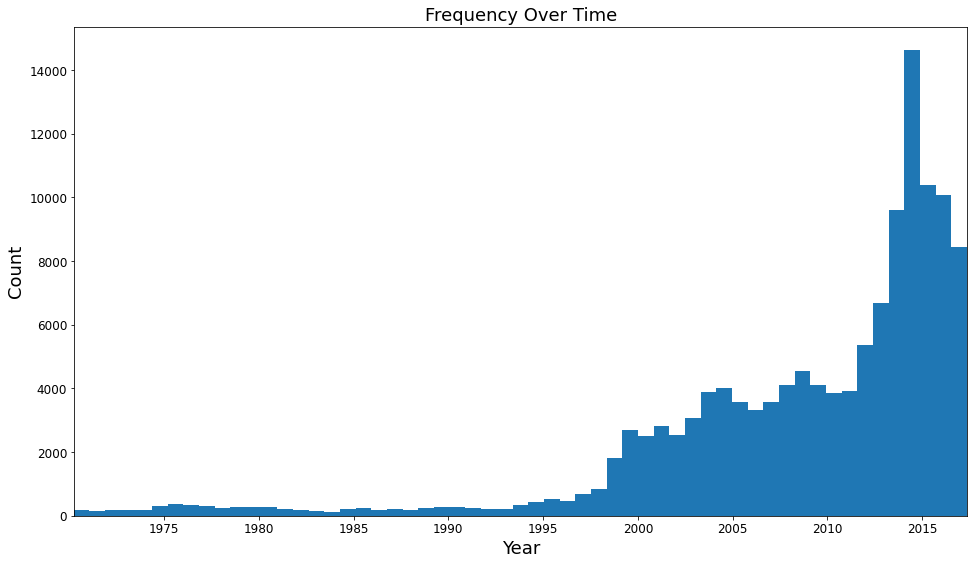

In [33]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.hist(df['occured'], bins=int(len(df['occured'])**0.5))
ax.set_title('Frequency Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_xlim(100, 17300)

fig.savefig('../img/time_freq.png')

In [21]:
max(df['occured'])

Timestamp('2021-07-02 23:30:00')

In [35]:
df['shape'].value_counts()

Light         27276
Circle        14410
Triangle      12407
Fireball      10823
Unknown        9339
Other          8963
Sphere         8907
Disk           7740
Oval           5841
Formation      4216
Changing       3213
Cigar          3037
Flash          2412
               2335
Rectangle      2228
Cylinder       2003
Diamond        1946
Chevron        1558
Teardrop       1187
Egg            1140
Cone            558
Cross           426
light             8
other             3
TRIANGULAR        2
rectangle         2
circle            2
triangle          1
fireball          1
Delta             1
Name: shape, dtype: int64

<ipython-input-40-7fc2024970a5>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df['shape'].value_counts().index,rotation=90)


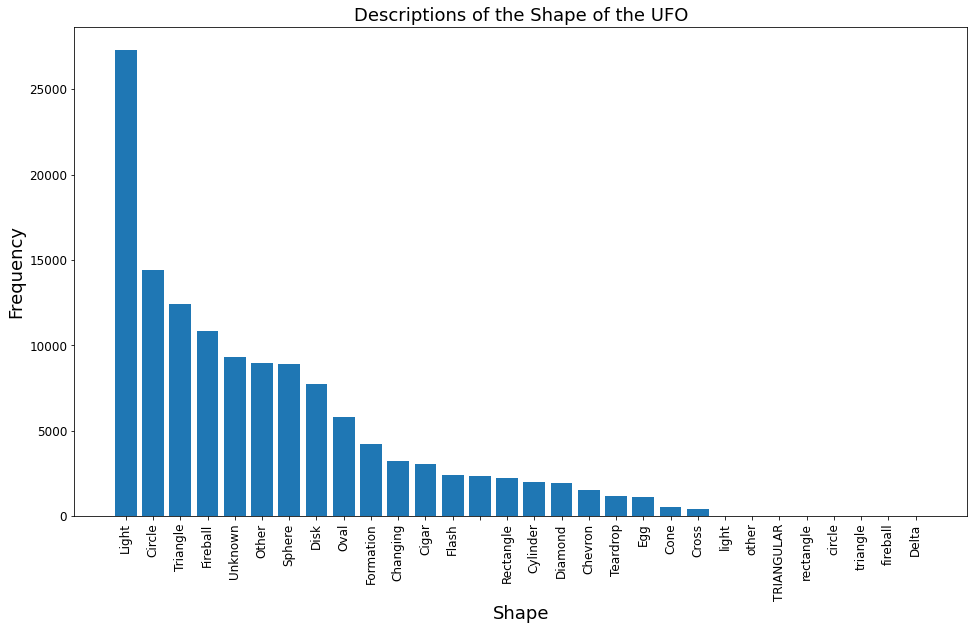

In [40]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(df['shape'].value_counts().index, df['shape'].value_counts())
ax.set_xticklabels(labels=df['shape'].value_counts().index,rotation=90)
ax.set_title('Descriptions of the Shape of the UFO')
ax.set_xlabel('Shape')
ax.set_ylabel('Frequency')

fig.savefig('../img/shape.png')

In [41]:
df['state'].count_values()

AttributeError: 'Series' object has no attribute 'count_values'